In [1]:
import sys
import os
import pandas as pd
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
sys.path.insert(0, '../')
from analysis.analysis_utils import *

/home/leehojoon/.pyenv/versions/3.9.5/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
eval_df = read_and_concatenate_eval_df(directory_path='../results/scaling/utd')
print(eval_df['exp_name'].unique())
eval_df

['simba_utd1_reset' 'simbaV2_utd2' 'simba_utd8' 'simbaV2_utd1'
 'simba_utd1' 'simbaV2_utd4' 'simba_utd8_reset' 'simbaV2_utd1_reset'
 'simba_utd2_reset' 'simba_utd4' 'simba_utd2' 'simbaV2_utd2_reset'
 'simbaV2_utd8_reset' 'simbaV2_utd4_reset' 'simbaV2_utd8'
 'simba_utd4_reset']


,exp_name,env_name,seed,metric,env_step,value
0,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,0.0,3.677929
1,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,100000.0,168.458138
2,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,200000.0,337.702732
3,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,300000.0,301.140735
4,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,400000.0,393.114038
...,...,...,...,...,...,...
109772,simba_utd4_reset,humanoid_stand,4000,avg_success,800000.0,0.000000
109773,simba_utd4_reset,humanoid_stand,4000,avg_success,850000.0,0.000000
109774,simba_utd4_reset,humanoid_stand,4000,avg_success,900000.0,0.000000
109775,simba_utd4_reset,humanoid_stand,4000,avg_success,950000.0,0.000000


#### Visualize Results

In [4]:
from rliable import library as rly
from rliable import metrics as rly_metrics
from rliable import plot_utils as rly_plot_utils

aggregate_func = lambda x: np.array([
  rly_metrics.aggregate_iqm(x),
  rly_metrics.aggregate_median(x),
  rly_metrics.aggregate_mean(x),
  rly_metrics.aggregate_optimality_gap(x)])

In [8]:
from scale_rl.envs.mujoco import MUJOCO_ALL, MUJOCO_RANDOM_SCORE, MUJOCO_TD3_SCORE
from scale_rl.envs.dmc import DMC_EASY_MEDIUM, DMC_HARD
from scale_rl.envs.humanoid_bench import HB_LOCOMOTION_NOHAND, HB_RANDOM_SCORE, HB_SUCCESS_SCORE, HB_LOCOMOTION_NOHAND_MINI
from scale_rl.envs.myosuite import MYOSUITE_TASKS

In [11]:
def replace_hypen_to_underbar(env_name_list):
    for idx in range(len(env_name_list)):
        env_name_list[idx] = env_name_list[idx].replace('-', '_')
    return env_name_list

def replace_hyphen_in_dict_keys(old_dict):
    new_dict = {}
    for k, v in old_dict.items():
        new_key = k.replace('-', '_')  # <--- direct string replace
        new_dict[new_key] = v
    return new_dict

MUJOCO_ALL = replace_hypen_to_underbar(MUJOCO_ALL)
DMC_EM = replace_hypen_to_underbar(DMC_EASY_MEDIUM)
DMC_HARD = replace_hypen_to_underbar(DMC_HARD)
MYOSUITE_TASKS = replace_hypen_to_underbar(MYOSUITE_TASKS)
HB_LOCOMOTION_NOHAND = replace_hypen_to_underbar(HB_LOCOMOTION_NOHAND)
HB_LOCOMOTION_NOHAND_MINI = replace_hypen_to_underbar(HB_LOCOMOTION_NOHAND_MINI)

MUJOCO_RANDOM_SCORE = replace_hyphen_in_dict_keys(MUJOCO_RANDOM_SCORE)
MUJOCO_TD3_SCORE = replace_hyphen_in_dict_keys(MUJOCO_TD3_SCORE)
HB_RANDOM_SCORE = replace_hyphen_in_dict_keys(HB_RANDOM_SCORE)
HB_SUCCESS_SCORE = replace_hyphen_in_dict_keys(HB_SUCCESS_SCORE)

eval_df['env_name'] = eval_df['env_name'].str.replace('-', '_')
eval_df

,exp_name,env_name,seed,metric,env_step,value
0,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,0.0,3.677929
1,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,100000.0,168.458138
2,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,200000.0,337.702732
3,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,300000.0,301.140735
4,simba_utd1_reset,h1_sit_hard_v0,0,avg_return,400000.0,393.114038
...,...,...,...,...,...,...
109772,simba_utd4_reset,humanoid_stand,4000,avg_success,800000.0,0.000000
109773,simba_utd4_reset,humanoid_stand,4000,avg_success,850000.0,0.000000
109774,simba_utd4_reset,humanoid_stand,4000,avg_success,900000.0,0.000000
109775,simba_utd4_reset,humanoid_stand,4000,avg_success,950000.0,0.000000


In [12]:
cur_exp_names = [
    'simba_utd1', 
    'simba_utd2', 
    'simba_utd4',
    'simba_utd8', 
    'simba_utd1_reset', 
    'simba_utd2_reset', 
    'simba_utd4_reset', 
    'simba_utd8_reset', 
    'simbaV2_utd1', 
    'simbaV2_utd2', 
    'simbaV2_utd4',
    'simbaV2_utd8', 
    'simbaV2_utd1_reset', 
    'simbaV2_utd2_reset', 
    'simbaV2_utd4_reset', 
    'simbaV2_utd8_reset', 
]
cur_exp_names

['simba_utd1',
 'simba_utd2',
 'simba_utd4',
 'simba_utd8',
 'simba_utd1_reset',
 'simba_utd2_reset',
 'simba_utd4_reset',
 'simba_utd8_reset',
 'simbaV2_utd1',
 'simbaV2_utd2',
 'simbaV2_utd4',
 'simbaV2_utd8',
 'simbaV2_utd1_reset',
 'simbaV2_utd2_reset',
 'simbaV2_utd4_reset',
 'simbaV2_utd8_reset']

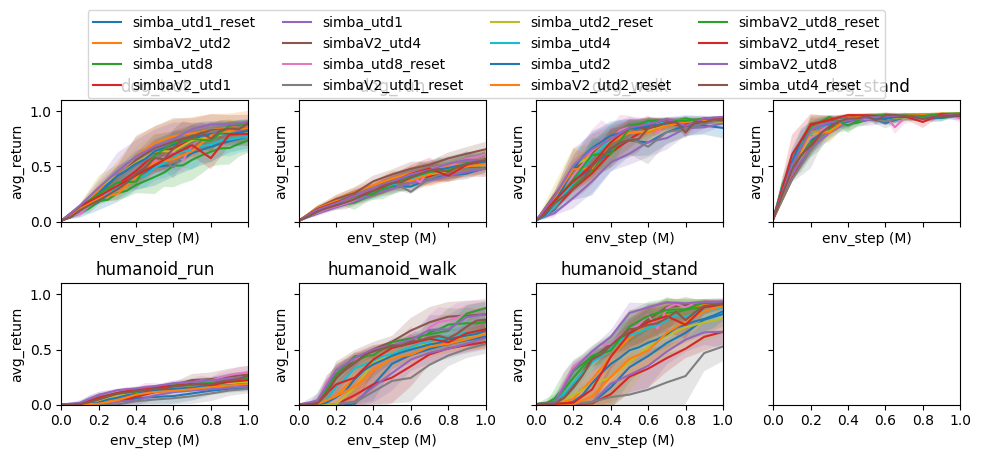

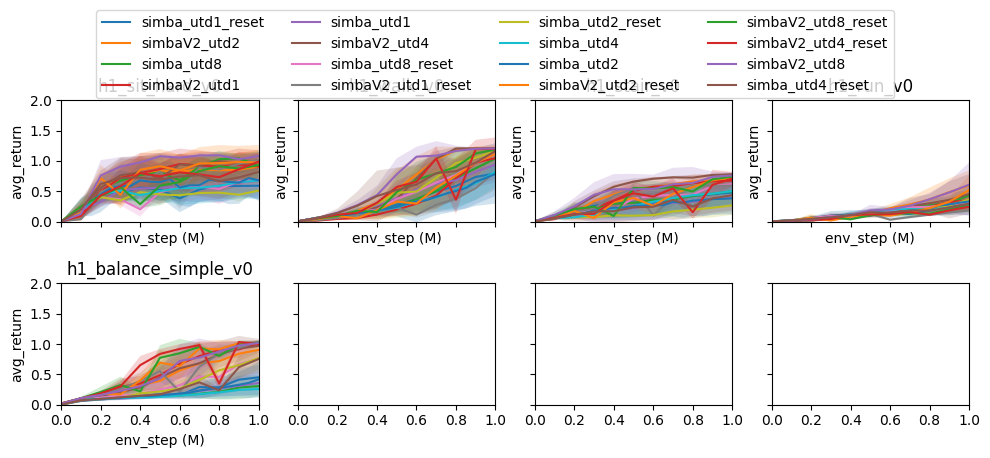

In [13]:
domain_metric_mats = defaultdict(dict)
all_metric_mats = defaultdict(list)

for env_type in ["DMC_HARD", "HBench_HARD"]:
    if env_type == "DMC_HARD":
        env_list = DMC_HARD
        env_step = 1e6
        metric_type = "avg_return"
        plot_height = 4
        y_lim_max = 1.1

    elif env_type == "HBench_HARD":
        env_list = HB_LOCOMOTION_NOHAND_MINI
        env_step = 1e6
        metric_type = "avg_return"
        plot_height = 4
        y_lim_max = 2.0

    # Filter eval_df for current environment set and experiments
    _eval_df = eval_df[eval_df["env_name"].isin(env_list)]
    _eval_df = _eval_df[_eval_df["exp_name"].isin(cur_exp_names)]

    # Additional environment-specific normalization, etc.
    if env_type == "MUJOCO":
        _eval_df = normalize_score_with_random_and_base_score(
            _eval_df,
            MUJOCO_RANDOM_SCORE,
            MUJOCO_TD3_SCORE,
        )
    elif env_type in ["DMC_EM", "DMC_HARD"]:
        _eval_df.loc[:, "value"] /= 1000.0
    elif env_type == "HBench_HARD":
        _eval_df = normalize_score_with_random_and_base_score(
            _eval_df,
            HB_RANDOM_SCORE,
            HB_SUCCESS_SCORE,
        )

    # (Optional) plot metric history for each environment in this env_type
    plot_metric_history_per_env(
        _eval_df,
        num_plots_per_row=4,
        metric=metric_type,
        x_lim_max=env_step,
        y_lim_max=y_lim_max,
        plot_width=10,
        plot_height=plot_height,
        y_label=metric_type,
    )

    # Generate metric matrix dictionary for this env_type
    _metric_matrix_dict = generate_metric_matrix_dict(
        _eval_df, env_step=env_step, metric_type=metric_type
    )

    # Collect these matrices into all_metric_mats
    for exp_name, mat in _metric_matrix_dict.items():
        domain_metric_mats[env_type][exp_name] = mat
        all_metric_mats[exp_name].append(mat)

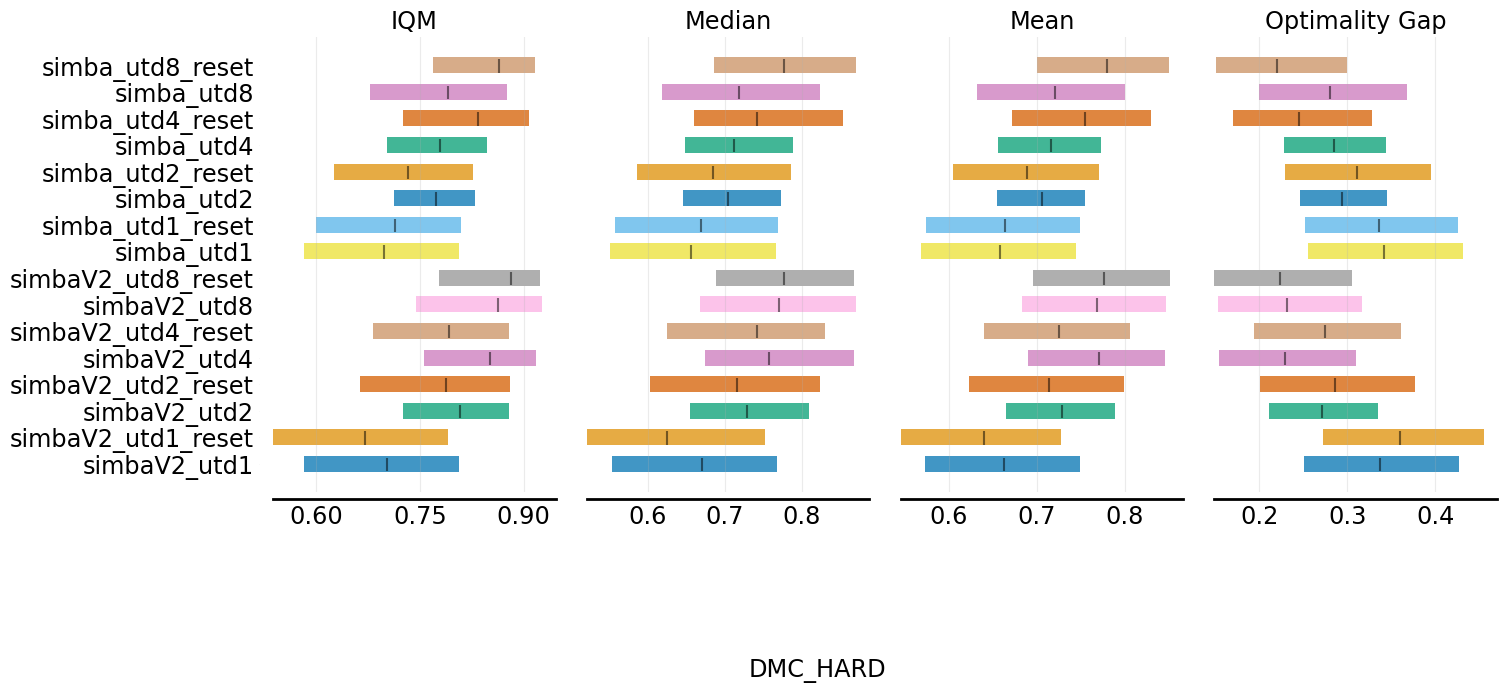

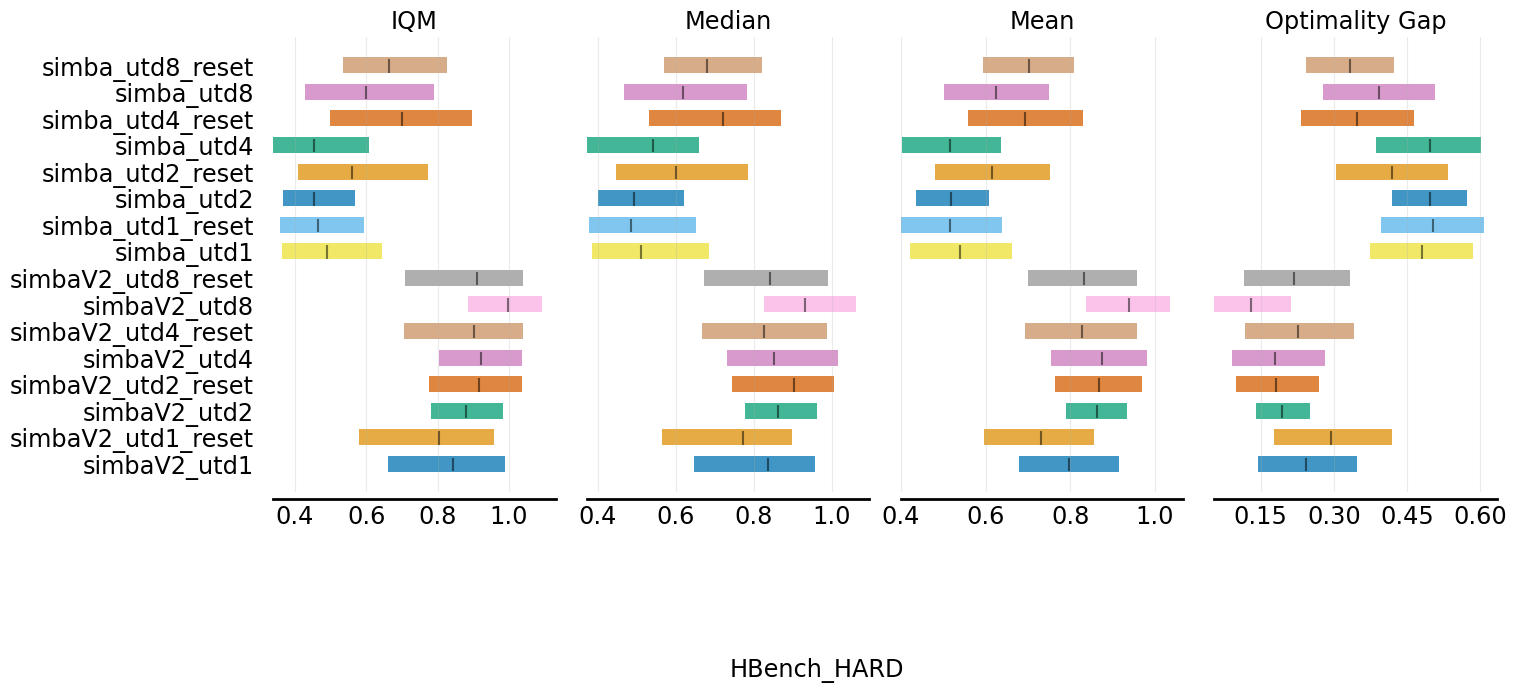

In [20]:
domain_aggregate_scores = {}
domain_aggregate_score_cis = {}

for env_type, exp_dict in domain_metric_mats.items():
    # exp_dict is {exp_name: matrix(# tasks_in_domain, # seeds)}
    aggregate_scores = {}
    aggregate_score_cis= {}

    for exp_name, mat in exp_dict.items():
        mat = exp_dict[exp_name]
        # If needed, you could do seed slicing or other checks here,
        # in case you must unify number of seeds across tasks in a domain.
        # Typically, generate_metric_matrix_dict() has already done that.

        # Build a single dict for robust-liness
        single_exp_dict = {exp_name: mat}

        # For example, rly.get_interval_estimates(...) with your chosen aggregator
        single_scores, single_cis = rly.get_interval_estimates(
            single_exp_dict,
            aggregate_func,  # e.g., rly.aggregate_iqm, or your custom aggregator
            reps=10_000
        )
        aggregate_scores[exp_name] = single_scores[exp_name]
        aggregate_score_cis[exp_name] = single_cis[exp_name]

    fig, axes = rly_plot_utils.plot_interval_estimates(
        aggregate_scores, aggregate_score_cis,
        metric_names=['IQM', 'Median', 'Mean', 'Optimality Gap'],
        algorithms=sorted(list(exp_dict.keys())),
        xlabel_y_coordinate=-0.2,
        xlabel=env_type,
    )